# Import packages and define functions

In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import datetime
from mpl_toolkits.basemap import Basemap
sns.set_theme()

In [3]:
from FenyvesiA_Bubi_Network_Functions import *

In [793]:
%run FenyvesiA_Bubi_Network_Functions.py

# Read the Data

In [62]:
stations = pd.read_csv('../BUBI/DATA/stations.csv', sep = ';')

In [828]:
stations.head(2)

,station_id,name,last_uptime,latitude,longitude,nextbike_id
0,030c3a53eeee8d818c4d11a7118196e6,0705-Erzsébet körút - Wesselényi utca,0000-00-00,47.500605,19.068403,253109
1,089c7c434c2b428d1337e8a161cfa50d,0303-Bécsi út - Óbudai Egyetem,0000-00-00,47.533661,19.035455,1758855


In [63]:
trips = pd.read_csv('../BUBI/DATA/trips-2018-2019-excel.csv', sep = ';')

# Cleaning

In [64]:
stations, trips = preprocess(stations, trips)

Shape of stations:  (308, 6)
Shape of trips:  (810274, 6)
Shape of stations:  (307, 6)
Shape of trips:  (760641, 11)


In [8]:
760641 / 810274

0.9387454120458018

That is a 6.2% drop, good.

In [6]:
trips.head(5)

,trip_id,bike_id,start_station_id,end_station_id,start_time,end_time,length
0,710374,86035,65ab4097debcfec49f3bd32f61c53bd6,60646b8cb6d7d59d56f817c9e990d743,2018-01-01 00:12:04,2018-01-01 00:12:04,0.000000
1,710375,86035,60646b8cb6d7d59d56f817c9e990d743,65ab4097debcfec49f3bd32f61c53bd6,2018-01-01 00:19:03,2018-01-01 00:19:03,0.000000
2,710376,87429,11fa1582d736cfcb565e8da1b7567cbe,b7b3d6950379d5540492f8d40ef3908a,2018-01-01 00:22:01,2018-01-01 00:44:02,22.016667
3,710377,86035,60646b8cb6d7d59d56f817c9e990d743,65ab4097debcfec49f3bd32f61c53bd6,2018-01-01 00:34:02,2018-01-01 00:34:02,0.000000
4,710378,86220,6251b71b74f829854152f3f8b6fce8be,473e051925f0e9adc983d350dad6b477,2018-01-01 00:34:02,2018-01-01 00:44:02,10.000000


In [826]:
trips.end_date.max()

datetime.date(2020, 6, 13)

## Check for missing values

### Stations

In [24]:
stations.isna().sum()

station_id     1
name           0
last_uptime    0
latitude       0
longitude      0
nextbike_id    2
dtype: int64

In [29]:
stations[stations.station_id.isna()]

,station_id,name,last_uptime,latitude,longitude,nextbike_id
307,NaN,még folyamatban,0000-00-00,0.0,0.0,NaN


In [30]:
stations[stations.nextbike_id.isna()]

,station_id,name,last_uptime,latitude,longitude,nextbike_id
183,3a03f478134faf799db0cdd0ee0127d4,1120-C4P Mobilitási Pont,0000-00-00,47.483359,19.053764,NaN
307,NaN,még folyamatban,0000-00-00,0.000000,0.000000,NaN


In [39]:
stations = stations.dropna(subset = ['station_id'])

### Trips

In [37]:
trips.isna().sum()

trip_id                0
bike_id                0
start_station_id       0
end_station_id      3050
start_time             0
end_time            3050
dtype: int64

In [38]:
trips[trips.end_station_id.isna()]

,trip_id,bike_id,start_station_id,end_station_id,start_time,end_time
26428,742888,86930,7b74131dc7bbca2d3cf096323fe85301,NaN,2018-02-21 02:27:02,NaN
76349,796177,86455,1f34fb9c1644a11766b103172029d9b3,NaN,2018-04-17 16:43:10,NaN
76351,796179,86684,becb2980919ba617359e70a146a2548a,NaN,2018-04-17 16:43:10,NaN
76353,796181,86937,140b2f06d032c92ad5a19a0ecb3a513a,NaN,2018-04-17 16:43:10,NaN
76355,796183,87100,5851eed54dce08b5567dcc59aeb6e350,NaN,2018-04-17 16:43:10,NaN
...,...,...,...,...,...,...
804011,1607449,87406,cd2d7469ed9e725c2079017924e6d7b6,NaN,2019-10-22 12:20:05,NaN
804146,1607584,87765,4ce6ae47f550ce87de39358a66ca156d,NaN,2019-10-22 14:21:03,NaN
804156,1607594,87748,4ce6ae47f550ce87de39358a66ca156d,NaN,2019-10-22 14:30:06,NaN
809681,1621791,87241,b1dee13c8ea6079e06864c05f95e02db,NaN,2019-11-26 10:24:12,NaN


In [40]:
trips = trips.dropna()

## Check for duplicates

In [44]:
stations[stations.duplicated()]

,station_id,name,last_uptime,latitude,longitude,nextbike_id


In [43]:
trips[trips.duplicated()]

,trip_id,bike_id,start_station_id,end_station_id,start_time,end_time


# Exploration

In [9]:
trips.length.median()

11.016666666666667

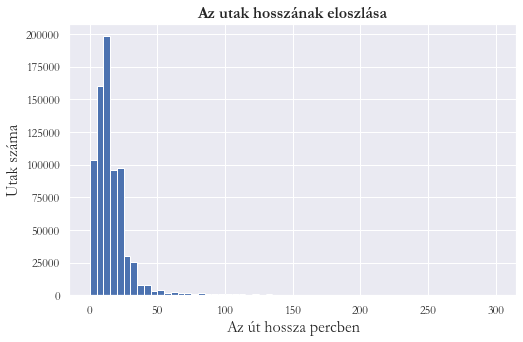

In [420]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

plt.hist(trips.length, bins = 60)
plt.title('Az utak hosszának eloszlása', font = 'garamond', size = 16, fontweight = 'bold')
plt.xlabel('Az út hossza percben', font = 'garamond', size = 16)
plt.ylabel('Utak száma', font = 'garamond', size = 16)
plt.xticks(font = 'garamond')
plt.yticks(font = 'garamond')

plt.show()

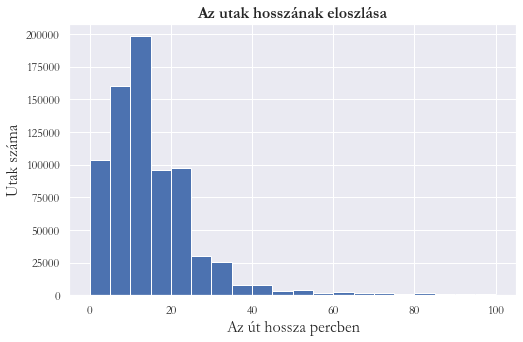

In [421]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

plt.hist(trips[trips.length <= 100].length, bins = 20)
plt.title('Az utak hosszának eloszlása', font = 'garamond', size = 16, fontweight = 'bold')
plt.xlabel('Az út hossza percben', font = 'garamond', size = 16)
plt.ylabel('Utak száma', font = 'garamond', size = 16)
plt.xticks(font = 'garamond')
plt.yticks(font = 'garamond')

plt.show()

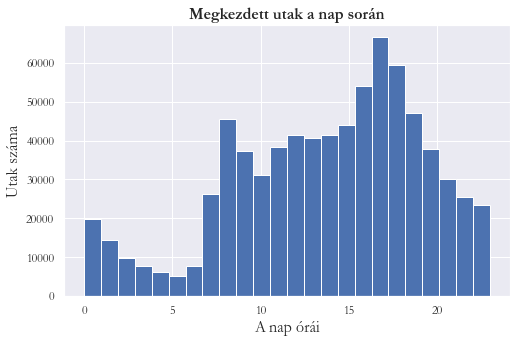

In [587]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

plt.hist(trips.start_datetime.apply(lambda x : x.hour), bins = 24)
plt.title('Megkezdett utak a nap során', font = 'garamond', size = 16, fontweight = 'bold')
plt.xlabel('A nap órái', font = 'garamond', size = 16)
plt.ylabel('Utak száma', font = 'garamond', size = 16)
plt.xticks(font = 'garamond')
plt.yticks(font = 'garamond')

plt.show()

# Create the network

In [794]:
G = create_graph(filter_datetime(trips), stations)

In [389]:
H = create_graph(filter_datetime(trips), cut = 20)

In [388]:
groupbyer(trips).trip_id.quantile(0.59)

20.0

# Describe the network

## Basics

In [413]:
anal_graph(G)

Nodes in the graph:  152
Edges in the graph:  17782
Clustering coefficient:  0.8476170083617234
Is the graph strongly connected?  False
Number of strongly connected components:  6
Number of weakly connected components:  1


*A directed graph is strongly connected if and only if every vertex in the graph is reachable from every other vertex.*

## Degree distribution

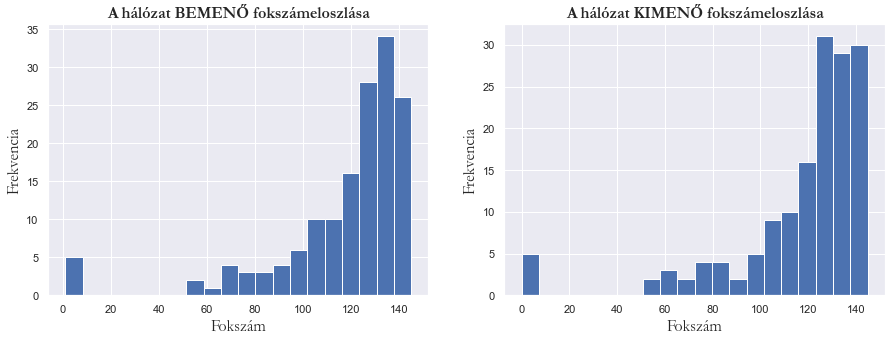

In [430]:
plot_degree_dist(G)

## Edge weight distribution

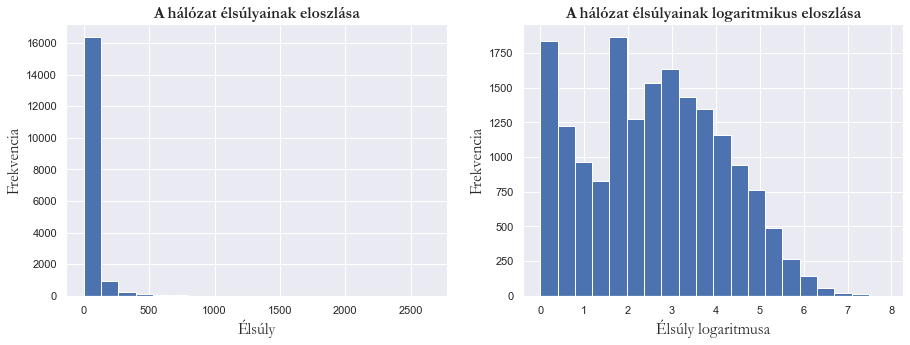

In [455]:
plot_weight_dist(G)

## Draw the network

In [520]:
m = Basemap(
        projection='merc',
        llcrnrlon=14,
        llcrnrlat=45,
        urcrnrlon=25,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

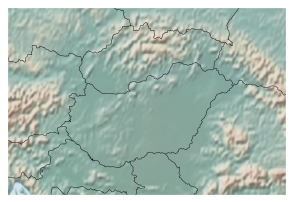

In [524]:
m.drawcountries()
m.drawcounties()
m.shadedrelief()

# Analyse the full network

## Distribution of traffic by stations

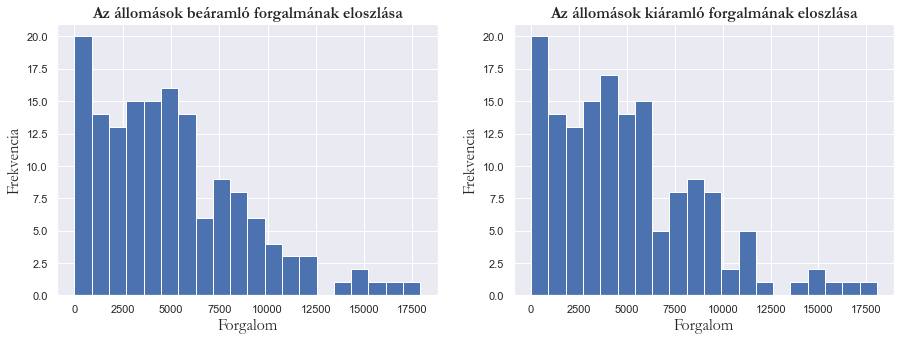

In [566]:
plot_traffic_dist(G)

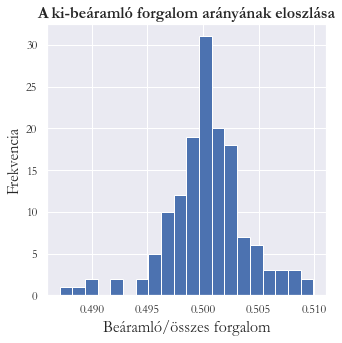

In [577]:
plot_inout_dist(G)

## Distribution of median trip length

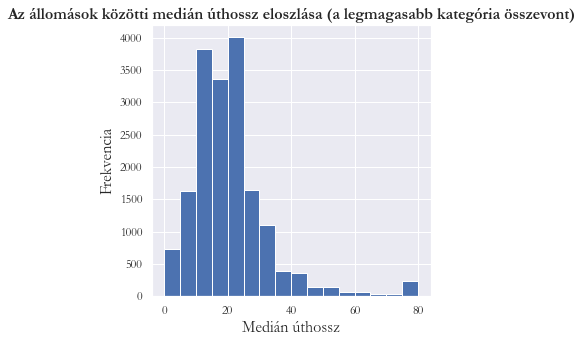

In [602]:
plot_trip_median(G, cut = 80, bins = 16)

## Traffic and trip length

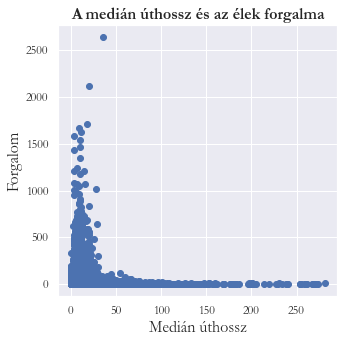

In [621]:
plot_traffic_length(G)

## Traffic and centrality

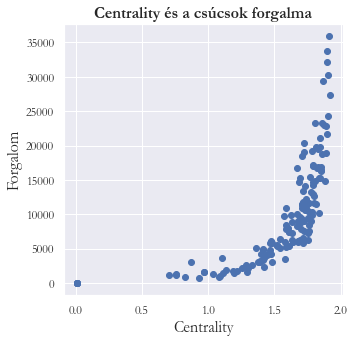

In [641]:
plot_traffic_cent(G)

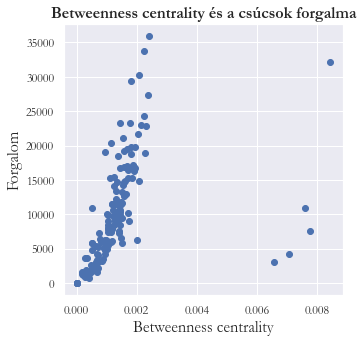

In [655]:
plot_traffic_bcent(G)

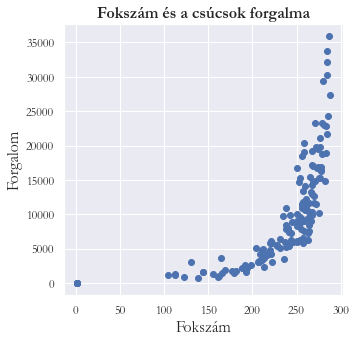

In [662]:
plot_traffic_degree(G)

Ez ugyanaz, mint a centrality és a forgalom

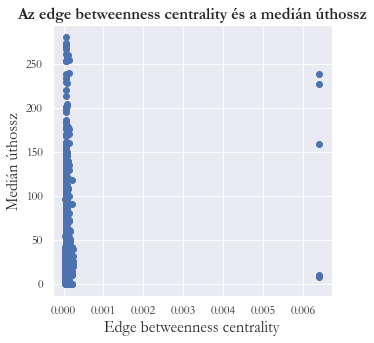

In [667]:
plot_bcent_length(G)

# Analyse the network of top 5 neighbors per station

In [767]:
H = topn_subgraph(G)

In [774]:
recalc_node_att(H)

In [768]:
anal_graph(H)

Nodes in the graph:  147
Edges in the graph:  735
Clustering coefficient:  0.2485677706006418
Is the graph strongly connected?  False
Number of strongly connected components:  42
Number of weakly connected components:  1


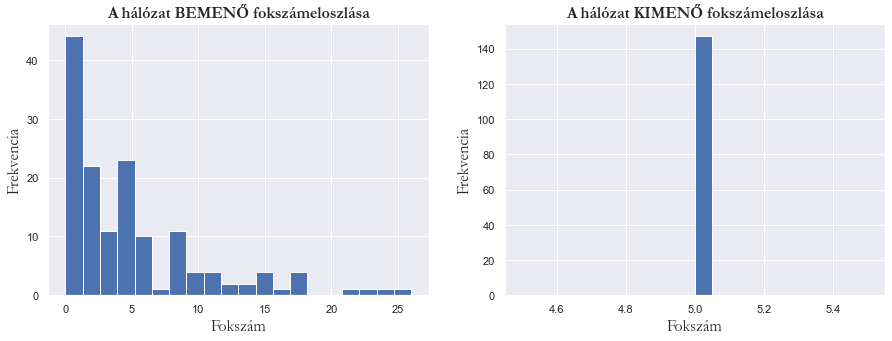

In [771]:
plot_degree_dist(H)

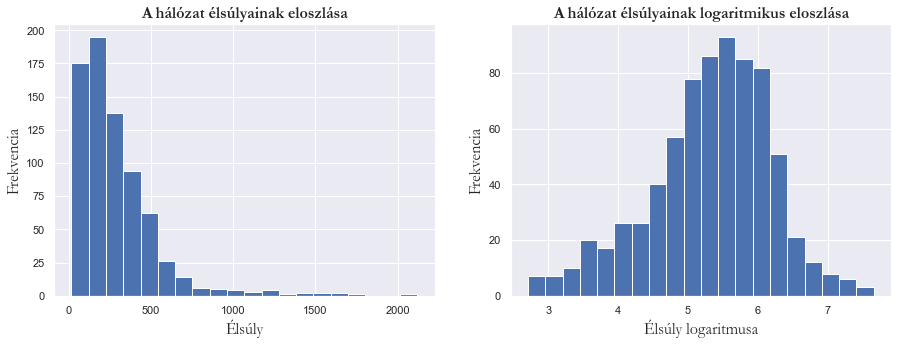

In [772]:
plot_weight_dist(H)

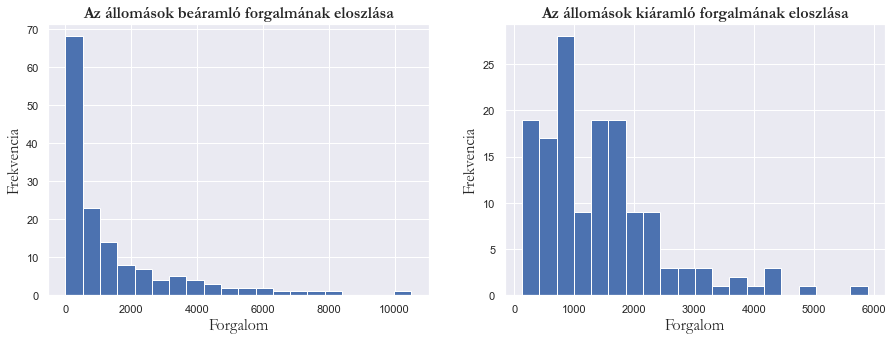

In [775]:
plot_traffic_dist(H)

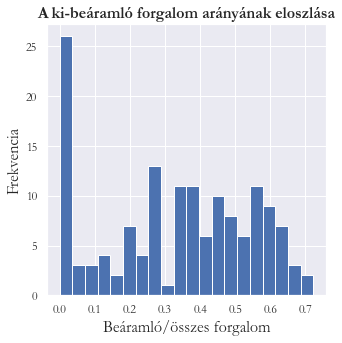

In [777]:
plot_inout_dist(H)

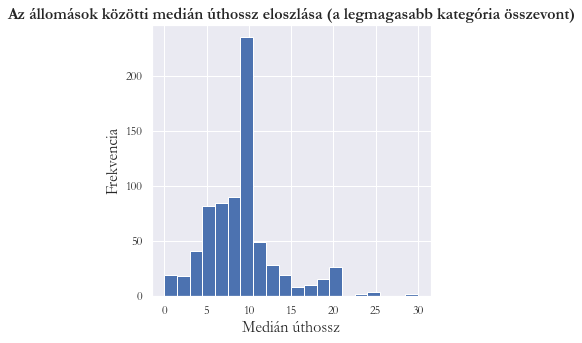

In [782]:
plot_trip_median(H)

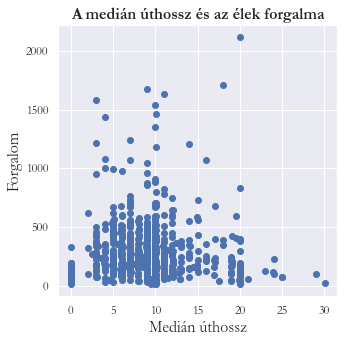

In [783]:
plot_traffic_length(H)

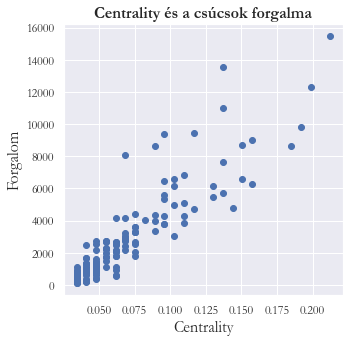

In [784]:
plot_traffic_cent(H)

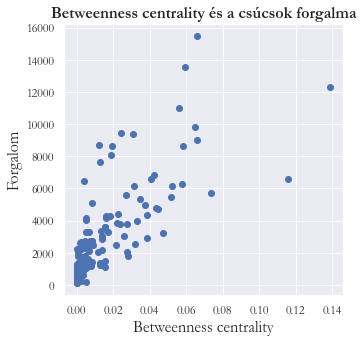

In [786]:
plot_traffic_bcent(H)

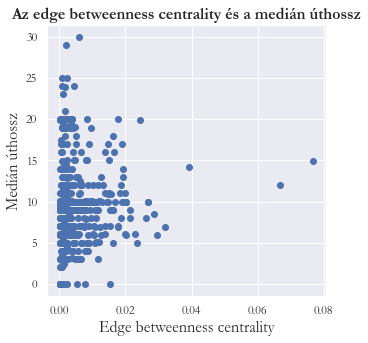

In [785]:
plot_bcent_length(H)

# Analyse different times of day

In [796]:
mor = create_graph(filter_datetime(trips, filter_start_time = '06:00:00', filter_end_time = '08:59:59'), stations, cut = 10)
day = create_graph(filter_datetime(trips, filter_start_time = '09:00:00', filter_end_time = '14:59:59'), stations, cut = 10)
aft = create_graph(filter_datetime(trips, filter_start_time = '15:00:00', filter_end_time = '18:59:59'), stations, cut = 10)
nig = create_graph(filter_datetime(trips, filter_start_time = '19:00:00', filter_end_time = '05:59:59'), stations, cut = 10)

In [801]:
for graph in [mor, day, aft, nig]:
    anal_graph(graph)
    print('------------')

Nodes in the graph:  147
Edges in the graph:  1694
Clustering coefficient:  0.2704723495547362
Is the graph strongly connected?  False
Number of strongly connected components:  17
Number of weakly connected components:  2
------------
Nodes in the graph:  147
Edges in the graph:  5044
Clustering coefficient:  0.5967458203306658
Is the graph strongly connected?  False
Number of strongly connected components:  2
Number of weakly connected components:  1
------------
Nodes in the graph:  147
Edges in the graph:  5077
Clustering coefficient:  0.593215374721474
Is the graph strongly connected?  False
Number of strongly connected components:  4
Number of weakly connected components:  1
------------
Nodes in the graph:  42
Edges in the graph:  55
Clustering coefficient:  0.03880471380471381
Is the graph strongly connected?  False
Number of strongly connected components:  41
Number of weakly connected components:  9
------------


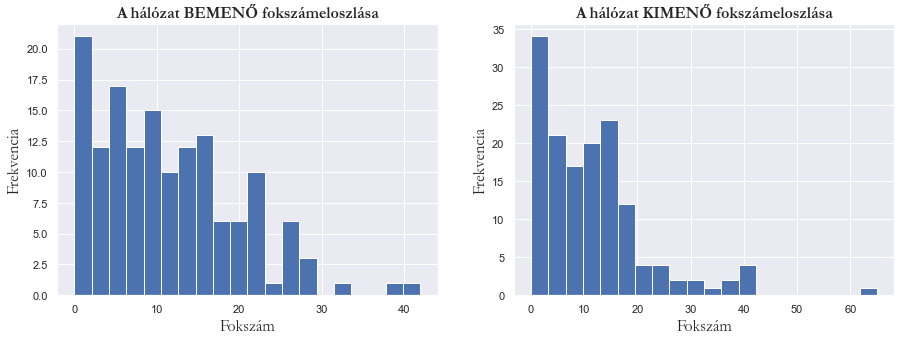

In [802]:
plot_degree_dist(mor)

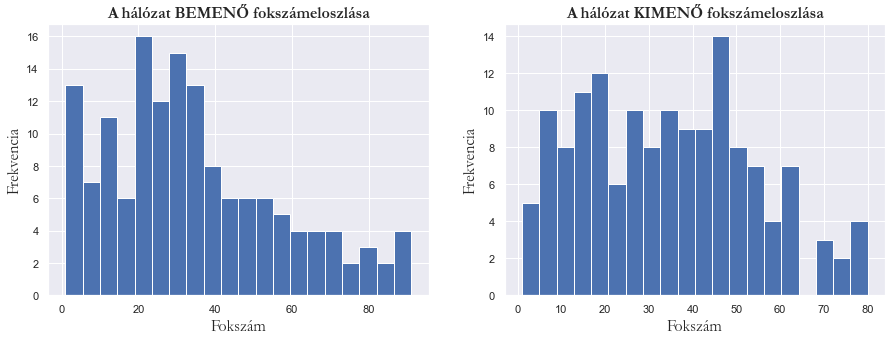

In [803]:
plot_degree_dist(day)

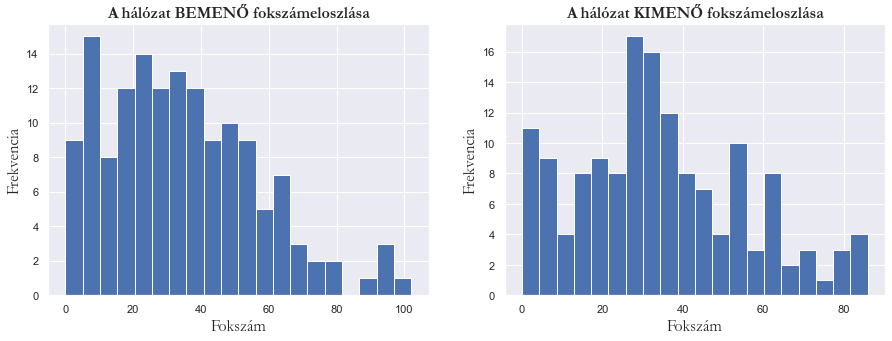

In [804]:
plot_degree_dist(aft)

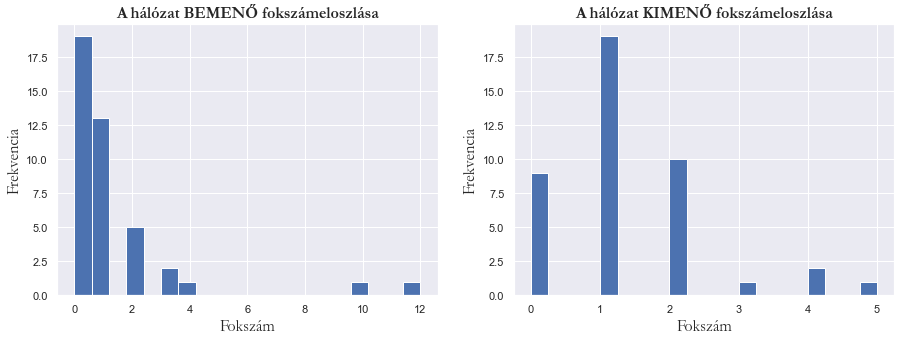

In [805]:
plot_degree_dist(nig)

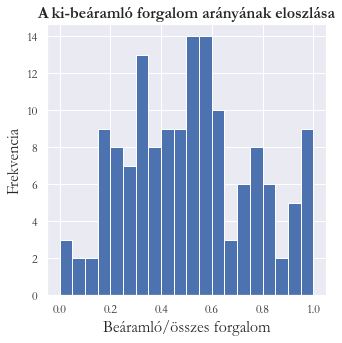

In [806]:
plot_inout_dist(mor)

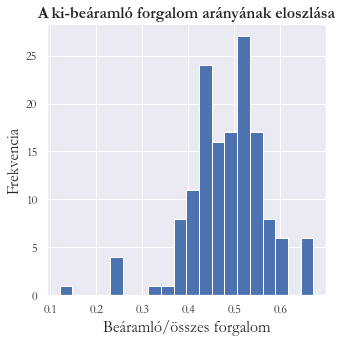

In [808]:
plot_inout_dist(day)

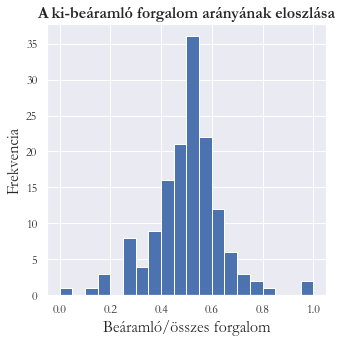

In [809]:
plot_inout_dist(aft)

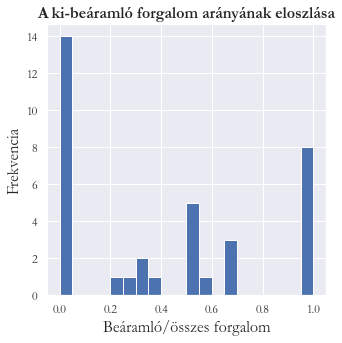

In [810]:
plot_inout_dist(nig)

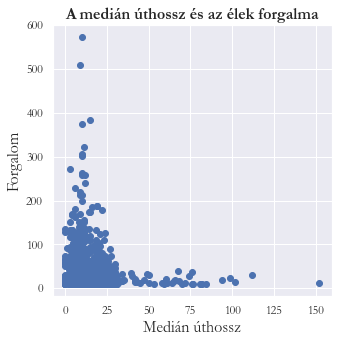

In [812]:
plot_traffic_length(mor)

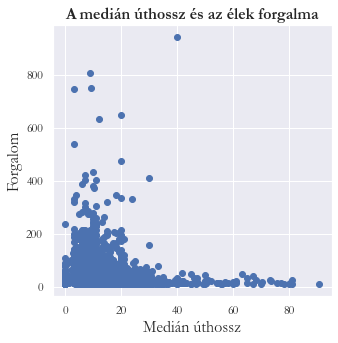

In [813]:
plot_traffic_length(day)

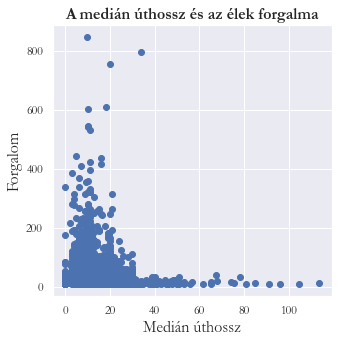

In [814]:
plot_traffic_length(aft)

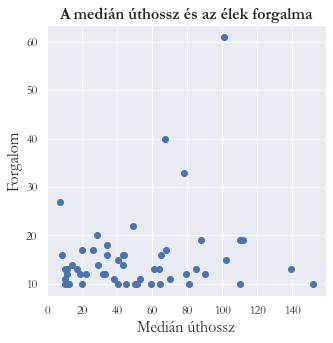

In [815]:
plot_traffic_length(nig)

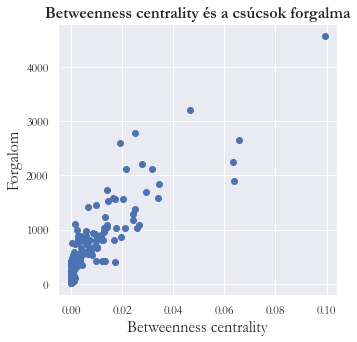

In [816]:
plot_traffic_bcent(mor)

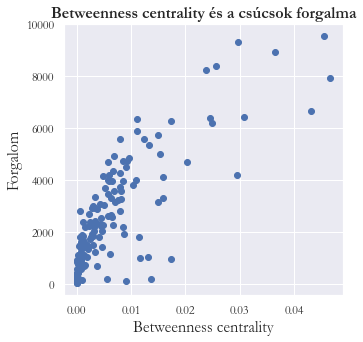

In [817]:
plot_traffic_bcent(day)

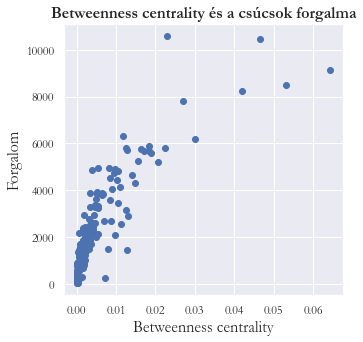

In [818]:
plot_traffic_bcent(aft)

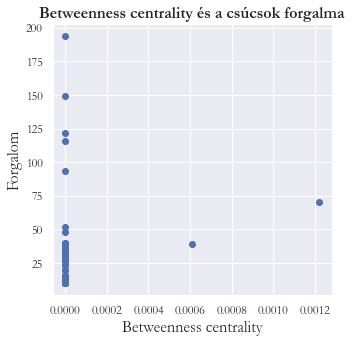

In [819]:
plot_traffic_bcent(nig)

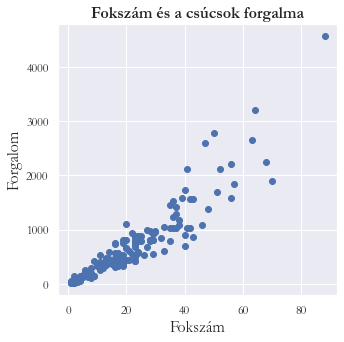

In [820]:
plot_traffic_degree(mor)

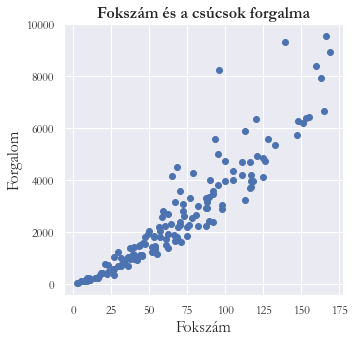

In [821]:
plot_traffic_degree(day)

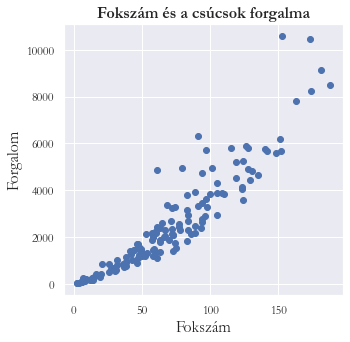

In [822]:
plot_traffic_degree(aft)

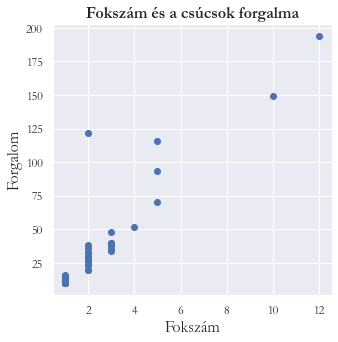

In [823]:
plot_traffic_degree(nig)